In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime as dt

In [2]:
# file path
filepath = '../Resources/preVsHosp.csv'

# Reading CSV File
org_data_df = pd.read_csv(filepath)
org_data_df.head()

,Unnamed: 0,Covid Status,Gender,Hospitalized,Age Group,Pre-Existing Condition
0,0,Laboratory-confirmed case,Male,No,10 - 19 Years,No
1,1,Laboratory-confirmed case,Male,No,10 - 19 Years,No
2,2,Laboratory-confirmed case,Male,No,10 - 19 Years,No
3,3,Laboratory-confirmed case,Male,No,10 - 19 Years,Yes
4,4,Laboratory-confirmed case,Male,No,10 - 19 Years,No


In [3]:
del org_data_df["Unnamed: 0"]
org_data_df

,Covid Status,Gender,Hospitalized,Age Group,Pre-Existing Condition
0,Laboratory-confirmed case,Male,No,10 - 19 Years,No
1,Laboratory-confirmed case,Male,No,10 - 19 Years,No
2,Laboratory-confirmed case,Male,No,10 - 19 Years,No
3,Laboratory-confirmed case,Male,No,10 - 19 Years,Yes
4,Laboratory-confirmed case,Male,No,10 - 19 Years,No
...,...,...,...,...,...
991891,Laboratory-confirmed case,Female,Yes,30 - 39 Years,Yes
991892,Laboratory-confirmed case,Female,No,30 - 39 Years,Yes
991893,Laboratory-confirmed case,Female,No,30 - 39 Years,Yes
991894,Laboratory-confirmed case,Female,No,30 - 39 Years,No


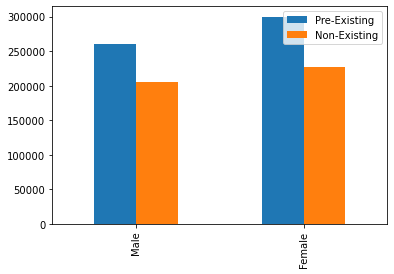

In [28]:
hosp_y = len(org_data_df.loc[(org_data_df["Pre-Existing Condition"] == "Yes")])
hosp_n = len(org_data_df.loc[(org_data_df["Pre-Existing Condition"] == "No")])

male_y = org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "Yes")]
female_y = org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "Yes")]

male_hy = org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Hospitalized"] == "Yes")]
female_hy = org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Hospitalized"] == "Yes")]
male_hn = org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Hospitalized"] == "No")]
female_hn = org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Hospitalized"] == "No")]

male_pre = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "Yes")])
female_pre = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "Yes")])

male_nopre = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "No")])
female_nopre = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "No")])

gender = ["Male", "Female"]
prex_df = pd.DataFrame({"Pre-Existing": [male_pre, female_pre], "Non-Existing" : [male_nopre, female_nopre]}, index = gender)
prex_df.plot.bar()